# Machine Learning: No deep Learning

## 1. Binary Logistic Regression

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Formulation

**Logistic Regression is a classification model where the prediction function is a sigmoid function.**
> The prediction function is defined as: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))}.$$

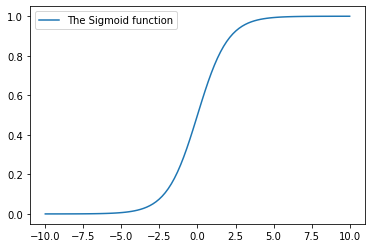

In [1]:
# Plotting a sigmoid function
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))

x_coords = np.linspace(-10, 10, 100) 
plt.plot(x_coords, sigmoid(x_coords))
plt.legend(["The Sigmoid function"])

### 1.2 The Log-Likelihood as loss function

We will use a probabilistic interpretation of the sigmoid prediction function (as a **Bernouilli distribution**). Let $$\begin{align} p(y=1 | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta), \\ p(y=0 | \mathbf{x}; \theta) &= 1 - f(\mathbf{x}; \theta). \end{align}$$

Therefore, the **likelihood**, $L(\theta)$, is defined as 
$$
\begin{align} 
    L(\theta) = p(y | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta)^y (1 - f(\mathbf{x}; \theta))^{(1-y)}, \\
    &= \Pi_{i=1}^n f(\mathbf{x}_i; \theta)^{y_i} (1 - f(\mathbf{x}_i; \theta))^{(1-y_i)}. \\
\end{align}
$$


The **Log-likelihood** is 
$$ 
\begin{aligned} 
    \log L(\theta) &=  \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)), \\
    &= \sum_{i=1}^n y_i \log(\exp(- (\mathbf{x}_i^T \mathbf{w} + b )) + 1) + (1 - y_i) \log(\exp(\mathbf{x}_i^T \mathbf{w} + b) + 1)\\
\end{aligned} 
$$

The standard logistic regression loss function is therefore given by the **negative log-likelihood**
$$\mathcal{L}(\theta) = - \log L(\theta).$$

We now, need to compute the gradient of the loss w.r.t the parameters $(\mathbf{w}, b)$.

$$
\begin{align}
\nabla_{\mathbf{w}} \mathcal{L}(\theta) &= - \sum_{i=1}^n y_i \nabla_{\mathbf{w}}  \log f(\mathbf{x}_i; \theta) + (1-y_i) \nabla_{\mathbf{w}}  \log (1 - f(\mathbf{x}_i; \theta)), \\
&=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big)\nabla_{\mathbf{w}} f(\mathbf{x}_i; \theta), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{\mathbf{w}} (\mathbf{x}_i^T\mathbf{w} + b), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \ \mathbf{x}_i , \\
&= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)  \mathbf{x}_i
\end{align}
$$

$$
\begin{align}
\nabla_{b} \mathcal{L}(\theta) &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{b} (\mathbf{x}_i^T\mathbf{w} + b), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) , \\
&= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)
\end{align}
$$

#### Toy example of a Logistic Regressor

1. **Generate a random binary dataset**

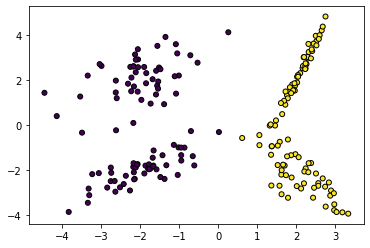

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

# we create 50 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=2, class_sep=2.0)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

2. **Designing the Logistic Model**

In [3]:
import numpy as np

class MyBinaryLogisticRegression:
    def __init__(self, n_feats, n_iter, lr, regul='l2', r_lambda=0.1):
        """
        A class for binary logistic regression model
        
        n_feats: (integer) 
            Dimension of the input data
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        """
        self.w = np.zeros((1, n_feats))
        self.b = 0

        self.n_feats = n_feats
        self.n_iter = n_iter
        self.lr = lr
        self.r_lambda = r_lambda
        self.regul = regul
        
        self.losses = []
        self.grads = []

    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*(np.sum((y*np.log(probs)) + ((1-y)*(np.log(1-probs)))))

        # computing the gradient 
        dw = (1/m)*(np.dot((probs - y), X)) 
        
        if self.regul == "l2":
            dw += 2*self.r_lambda* self.w # adding l2 regularization
        elif self.regul == 'l1':
            dw + self.r_lambda * np.sign(self.w) # adding l1 regularization
            
        db = (1/m)*(np.sum(probs - y))

        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):            
        return 1./(1. + np.exp(-np.dot(self.w, X.T) - self.b))
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            if (i % 10 == 0):
                print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return activ >= 0.5 # np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

3. **Instanciating the model and training**

In [4]:
my_clf = MyBinaryLogisticRegression(n_feats=2, n_iter=100, lr=0.1, r_lambda=0.01)
print(X.shape, y.shape)
my_clf.fit(X, y)

(200, 2) (200,)
Standard Logistic Regression: Iter 0, Cost 0.6931471805599452
Standard Logistic Regression: Iter 10, Cost 0.2542989009626561
Standard Logistic Regression: Iter 20, Cost 0.1611625568957351
Standard Logistic Regression: Iter 30, Cost 0.12225487791610239
Standard Logistic Regression: Iter 40, Cost 0.10089747176280184
Standard Logistic Regression: Iter 50, Cost 0.08738415505958798
Standard Logistic Regression: Iter 60, Cost 0.07805888616671461
Standard Logistic Regression: Iter 70, Cost 0.071237063883419
Standard Logistic Regression: Iter 80, Cost 0.06603354206469617
Standard Logistic Regression: Iter 90, Cost 0.06193802901054237
Standard Logistic Regression: Iter 99, Cost 0.05893634539376782


4. **Plotting the decision boundary of the model**

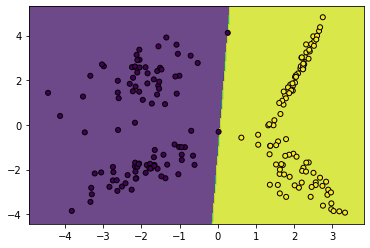

In [5]:
def print_decision(X, clf):
    plt.figure()
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

print_decision(X, my_clf)

### 1.3 The regularized Log-Likelihood as loss function

The **regularized** logistic regression loss function consists in assuming that the parameters follow a certain *a priori* distribution.

We then used the **maximum a posteriori (MAP)** estimation to derive the final loss function.

Let $p(\theta)$ be the *a priori*.

The goal is to minimize
$$
\begin{align}
\mathcal{L}(\theta) &= - \log L(\theta)p(\theta), \\
&= - \log L(\theta) - \log p(\theta).
\end{align}$$

1. The $\ell_2$ regularization: the *a priori* is given by ($p$ follows a normal distribution): $$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_2^2)$$
2. The $\ell_1$ regularization: the *a priori* is given by ($p$ follows a laplacian distribution): $$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_1)$$

Therefore, depending on the *a priori* the regularized loss is given by
1. for the $\ell_2$ regularization: 
$$ \mathcal{L}(\theta)  = \overbrace{ -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \lambda \underbrace{\|\mathbf{w}\|_2^2}_{\ell_2-\text{regularization}},$$
2. for the $\ell_1$ regularization:  $$ \mathcal{L}(\theta)  = \overbrace{ -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \lambda \underbrace{\|\mathbf{w}\|_1}_{\ell_1-\text{regularization}}, $$
where $\lambda \in \mathbb{R}$ balances the importance of the terms. 

> Note that, the above two equations can be rewritten as 
$$ \mathcal{L}(\theta)  =  \overbrace{ -\frac{C}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))}^{\text{negative log-likelihood}} + \underbrace{\phi(\theta)}_{\text{regularization }(\ell_2, \ell_1)}, $$ 
where $C \in \mathbb{R}$.

#### Example using the scikit-learn model

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(C=50. / 100 , penalty='l2', tol=0.1)
clf.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

score: 1.0, sparsity: 0.0 


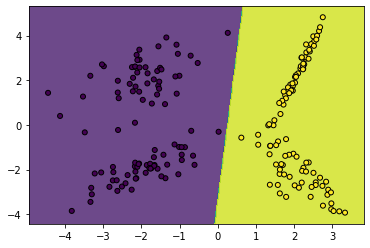

In [8]:
print_decision(X, clf)
print("score: {}, sparsity: {} ".format(clf.score(X, y), np.mean(clf.coef_ == 0) * 100))

## 2. Multi-class classification

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, \mathbf{y_i} \in \{0, 1\}^{C})\}_{i=1}^n$ be our training dataset, where $C$ is the number of classes. The samples are **i.i.d**.

<img src="images/binary_vs_multi_classif.png" width="90%"/>

### 2.1 Formulation

In the case of multi-class tasks, the multinomial logistic regression can be used (*a.k.a.* **softmax regression**). The probability to obtain the class $c$ given an input $\mathbf{x}$ is given by
$$f(\mathbf{x}; \theta)[c] = p(y = c | \mathbf{x}; \theta) = \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})}, $$
where $(\mathbf{w}^{(k)}, b^{(k)})$ are the parameter set dedicated to the $k$-th class.

> Another way of working with multi-class data is to use a **one-versus-all** strategy. In other words, for each class, $c$, we train a binary logistic regressor where we label $c$ as $1$ and the other classes as $0$. And, at test time, we consider the argmax across all the regressors.

Notice that we can retrieve the binary formulation from the multinomial definition. Say we have two class 0 and 1, then 
$p(y = 1 | \mathbf{x}; \theta) = \frac{exp\big( \mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big)}{ exp\big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) + exp\big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)}\big)} = \frac{1 }{1 + exp\Big( \big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)} \big) - \big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) \Big)} = \frac{1 }{1 + exp \Big(  \mathbf{x}^T \big(\mathbf{w}^{(0)} - \mathbf{w}^{(1)} \big) +  \big(b^{(0)} -  b^{(1)}\big) \Big)}.$

> **N.B.**: The sofmax function is defined as 
$ \mathbf{t} \in \mathbf{R}^C \mapsto \text{softmax} (\mathbf{t}) = \frac{1 }{\sum_{k=1}^C e^{\mathbf{t}[k]}}\Big[e^{ \mathbf{t}[1]}, e^{ \mathbf{t}[2]}, \cdots, e^{ \mathbf{t}[C] }\Big] $

#### 2.1.2 The Loss function

Given a data point $\mathbf{x}$, the likelihood is given by
$$
 L(\theta) = p(y|\mathbf{x}; \theta) = \Pi_{k=1}^C p(y = k|\mathbf{x}; \theta)^{\mathbb{1}\{y=k\}},
$$

where $\mathbb{1}\{\cdot\}$ is the indicator function.

And the negative log-likelihood, our multi-class loss function, is
$$
 \mathcal{L}(\theta) = -\log L(\theta) = p(y|\mathbf{x}; \theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta).
$$

> Note we can add an additional regularization term. Using the same derivation given in the binary logistic section, we obtain the new regularized loss as
$$
 \mathcal{L}(\theta) = -\log L(\theta) p(\theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) + \lambda \phi(\theta),
$$
where $\phi$ can be any regularization function including the $\ell_2$-norm or the $\ell_1$-norm.

The gradient w.r.t. to the $c$-th parameter $\mathbf{w}^{(c)}$ is
$$
\begin{align}
 \nabla_{\mathbf{w}^{(c)}} - \log L(\theta) &= - \nabla_{\mathbf{w}^{(c)}}  \Big(\sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) \Big),\\
 &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} p(y = c|\mathbf{x}; \theta) ,\\
 &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})} ,\\
 &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)\frac{\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) }{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
 &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)  \frac{\mathbf{x} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})^2 \mathbf{x}}{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
 &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \big( \mathbf{x} p(y = c|\mathbf{x}; \theta) - p(y = c|\mathbf{x}; \theta)^2\mathbf{x} \big) ,\\
 &=-\big({\mathbb{1}\{y=c\}} +  p(y = c|\mathbf{x}; \theta) \big) \mathbf{x},
\end{align}
$$

### 2.2 Example  (MNIST: handwritten digits classification)

The main objective is to predict the digit inside an input image.
<img src="images/mnist_goal.png" width="40%">

The practical workflow is depicted below. 

1. Flattening the image to obtain a vector (*a.k.a* the **the feature vector**)
2. Applying the model
3. Using the argmax to retrieve the final output

<img src="images/mnist_practical.png" width="40%">

#### Import the important libraries
- **fetch_openml** will be used to retrieve the dataset
- **LogisticRegression** is the scikit-learn class for this type of model
- **train_test_split** is used to split dataset into 2 folds (train and test) eventually 3 with additional validation set
- **StandardScaler** is used to normalize the data by substracting the mean and dividing by the variance
- **check_random_state** is used to randomly permutate the data

In [9]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


#### We fix the number of training sample 

In [10]:
train_samples = 5000

#### Data acquisition and preprocesing
1. Load the MNIST data from https://www.openml.org/d/554
2. Shuffling the data randomly
3. Splitting the data into **Train** and **Test** sets
4. Normalizing the data

In [11]:
# Loading the images
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffling part
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Initializing the classifier

In [13]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)

#### Training the classifier

In [14]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

#### Printing some metrics:
- The sparsity level
- The Test score

In [15]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 17.09%
Test score with L1 penalty: 0.8724


**Plotting some test images and there predictions**

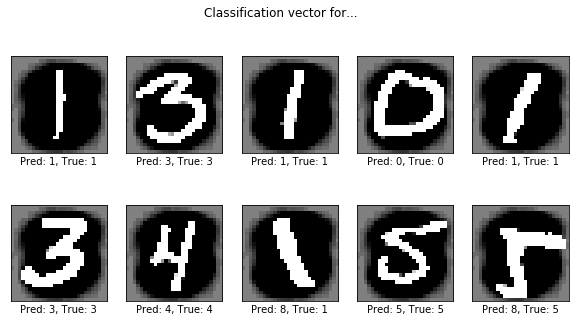

In [16]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    pred_plot = plt.subplot(2, 5, i + 1)
    
    pred = clf.predict(X_test[i:i+1])
    
    pred_plot.imshow(X_test[i].reshape(28, 28), interpolation='nearest', 
                     cmap=plt.cm.gray, vmin=-scale, vmax=scale)
    pred_plot.set_xticks(())
    pred_plot.set_yticks(())
    pred_plot.set_xlabel('Pred: %s, True: %s' %(int(pred[0]), y_test[i]))
plt.suptitle('Classification vector for...')
plt.show()

#### Plotting the learned parameters

In [17]:
def plot_coefs(coef, title='Classification vector for...'):
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l1_plot.set_xlabel('Class %i' % i)
    plt.suptitle(title)
    plt.show()

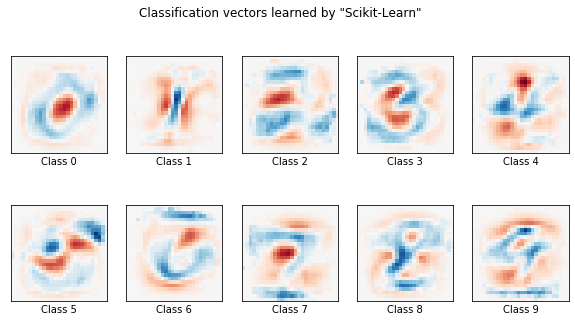

In [18]:
plot_coefs(clf.coef_.copy(), title='Classification vectors learned by "Scikit-Learn"')

### 2.3 Coding a Multi-Class Logistic Regressor  (test on MNIST)

In [19]:
class MyMultiClassLogisticRegression:
    def __init__(self, n_iter, lr, regul="l2", r_lambda=0.1):
        """
        A class for multiclass logistic regression model
         
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate  
        """
        
        self.n_iter = n_iter
        self.lr = lr
        self.regul = regul
        self.r_lambda = r_lambda 
        
        self.losses = []
        self.grads = []
    
    def init_params(self, n_feats, n_class):
        self.W = np.zeros((n_class, n_feats))
        self.b = np.zeros(n_class)

    def _optimize(self, X, y):
        """
            Computing the loss and the gradients
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples x n_class)
                one-hot endoded representation for each target 
        """
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*np.sum(y*np.log(probs))
        
        # ( \mathbb{1}\{y=c\} +  f(\mathbf{x}; \theta)[c] ) \mathbf{x}
        # computing the gradient 
        dw = []; db = []
        for i in range(self.W.shape[0]):
            dw.append(-(1/m) * (np.dot((probs[:, i] + y[:, i]), X)))  
            
            if self.regul=='l2':
                dw[-1] += 2*self.r_lambda*self.W[i] # adding l2 regularization
            elif self.regul == 'l1':
                dw[-1] += self.r_lambda*np.sign(self.W[i]) # adding l1 regularization
                
            db.append(-(1/m) * np.sum(probs[:, i] - y[:, i]) )

        grads = {"dLdw": np.array(dw), "dLdb": np.array(db)}

        return grads, cost

    def activation(self, X):      
        vect_of_eponents = np.exp(np.dot(X, self.W.T) + self.b) 
        return vect_of_eponents/ np.tile(np.sum(vect_of_eponents, 1), (self.W.shape[0],1)).T
    
    def one_hot_encode(self, y):
        v = np.zeros((y.size, len(np.unique(y))))
        v[np.arange(y.size), y.astype(int)] = 1
        return v
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        self.init_params(X.shape[1], len(np.unique(y)))
        one_hot_labels = self.one_hot_encode(y) 
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, one_hot_labels)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.W = self.W - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            if (i % 10 == 0):
                print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

In [28]:
my_mclr = MyMultiClassLogisticRegression(n_iter=100, lr=0.001, regul="l2", r_lambda=0.1)

In [29]:
print(X_train.shape, y_train.shape)
my_mclr.fit(X_train, y_train.astype(int))

(5000, 784) (5000,)
Multiclass Logistic Regression: Iter 0, Cost 2.3025850929940455
Multiclass Logistic Regression: Iter 10, Cost 2.218160055358677
Multiclass Logistic Regression: Iter 20, Cost 2.134057712298525
Multiclass Logistic Regression: Iter 30, Cost 2.050471516597702
Multiclass Logistic Regression: Iter 40, Cost 1.9676625707538422
Multiclass Logistic Regression: Iter 50, Cost 1.8859794940646863
Multiclass Logistic Regression: Iter 60, Cost 1.805872594888355
Multiclass Logistic Regression: Iter 70, Cost 1.7278890309638282
Multiclass Logistic Regression: Iter 80, Cost 1.6526359681690443
Multiclass Logistic Regression: Iter 90, Cost 1.5807132027885058
Multiclass Logistic Regression: Iter 99, Cost 1.5192615380309737


In [30]:
sparsity = np.mean(my_mclr.W == 0) * 100
score = my_mclr.score(X_test, y_test.astype(int))

print("Sparsity: %.2f%%" % sparsity)
print("Test score: %.4f" % score)

Sparsity: 17.09%
Test score: 0.7062


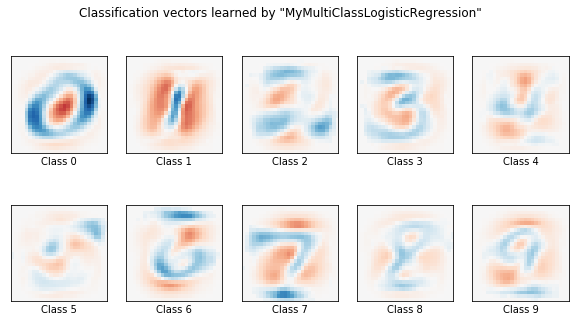

In [31]:
plot_coefs(my_mclr.W.copy(), title='Classification vectors learned by "MyMultiClassLogisticRegression"')

Multiclass Logistic Regression: Iter 0, Cost 1.3862943611198904
Multiclass Logistic Regression: Iter 10, Cost 1.295758949506689
Multiclass Logistic Regression: Iter 20, Cost 1.2068267810290965
Multiclass Logistic Regression: Iter 30, Cost 1.1181204673317533
Multiclass Logistic Regression: Iter 40, Cost 1.0304406551903509
Multiclass Logistic Regression: Iter 50, Cost 0.9446636117873163
Multiclass Logistic Regression: Iter 60, Cost 0.8616942891812124
Multiclass Logistic Regression: Iter 70, Cost 0.7824061495863495
Multiclass Logistic Regression: Iter 80, Cost 0.7075761650429278
Multiclass Logistic Regression: Iter 90, Cost 0.6378263312917515
Multiclass Logistic Regression: Iter 99, Cost 0.5797514781973065


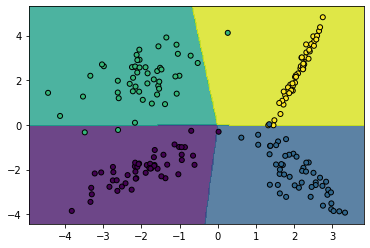

In [24]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_classes=4, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1, class_sep=2.0)
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
my_mclr.fit(X, y)
print_decision(X, my_mclr)

## 3. Support Vector Machine (SVM)

<img src="images/svm_margin.png">

## 4. Decision Trees and Random Forests

## 5. Clustering (K-Means)